In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.drop(columns=['Serial No.'], inplace=True)

In [5]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
X = df.iloc[:,:-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [7]:
y = df.iloc[:, -1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X, y)

In [9]:
scalar = MinMaxScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [10]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 10)                80        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [13]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
30/30 [==============================] - 1s 9ms/step - loss: 0.6860 - val_loss: 0.3569
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.1338 - val_loss: 0.0499
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.0338
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0263 - val_loss: 0.0325
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.0302
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0235 - val_loss: 0.0283
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0222 - val_loss: 0.0264
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.0247
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.0236
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0191 - val_loss: 0.0220
Epoch 11/

In [14]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [15]:
r2_score(y_test, y_pred)

0.7376503265006644

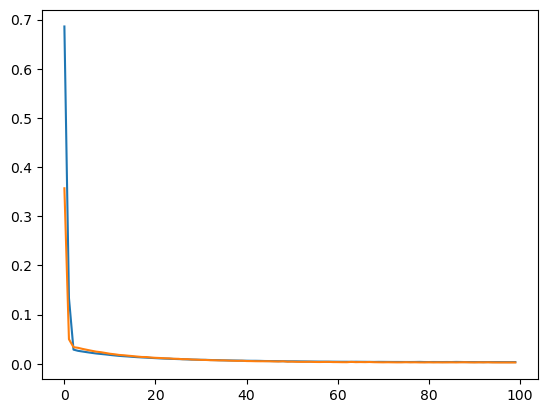

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])